In [1]:
import os
import sys
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy.cluster import hierarchy
import seaborn as sns
import spacy
import nltk
from konlpy.tag import Okt
import graphviz

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [54]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_lfw_people

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=1)

In [5]:
scaler = MinMaxScaler().fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
X, y = make_blobs(n_samples=50, centers=2, cluster_std=1, random_state=4)
X += 3

(0.0, 10.0)

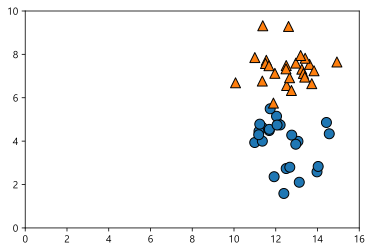

In [7]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlim(0, 16)
plt.ylim(0, 10)

In [8]:
scaler = QuantileTransformer(n_quantiles=50).fit(X)
X_trans = scaler.transform(X)

(0.0, 2.0)

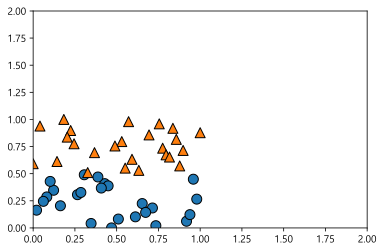

In [9]:
mglearn.discrete_scatter(X_trans[:, 0], X_trans[:, 1], y)
plt.xlim(0, 2)
plt.ylim(0, 2)

In [10]:
scaler.quantiles_

array([[10.07391193,  1.58657135],
       [10.99313649,  2.10376912],
       [10.99815287,  2.36006775],
       [11.18378052,  2.58367939],
       [11.19679821,  2.73569682],
       [11.23501274,  2.79716835],
       [11.34468785,  2.83183283],
       [11.35656532,  3.85665806],
       [11.35760513,  3.93528488],
       [11.37839711,  3.99078055],
       [11.5093186 ,  3.99907772],
       [11.54824906,  4.27689813],
       [11.67494727,  4.29564214],
       [11.68937095,  4.3389402 ],
       [11.69289001,  4.45456477],
       [11.7337095 ,  4.48709629],
       [11.8888119 ,  4.54322016],
       [11.92229526,  4.63824349],
       [11.95786868,  4.74115688],
       [12.03763281,  4.7467316 ],
       [12.06439343,  4.78117369],
       [12.1438515 ,  4.78248134],
       [12.20989214,  4.85948594],
       [12.38860303,  5.14664757],
       [12.49123469,  5.49162431],
       [12.50048972,  5.75339082],
       [12.50229021,  6.33454307],
       [12.5211582 ,  6.56405517],
       [12.61215674,

In [11]:
np.percentile(X_trans[:, 0], [0, 25, 50, 75, 100])

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [12]:
scaler = QuantileTransformer(output_distribution='normal', n_quantiles=50).fit(X)
X_trans2 = scaler.transform(X)

(-3.0, 3.0)

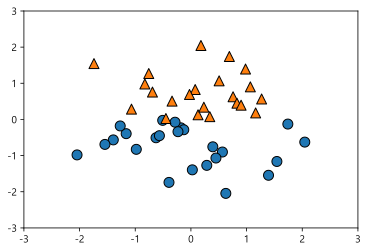

In [13]:
mglearn.discrete_scatter(X_trans2[:, 0], X_trans2[:, 1], y)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

In [14]:
StandardScaler().fit_transform(X)

array([[-0.30048277, -0.44697936],
       [-0.54529266,  0.05431534],
       [-1.06759174, -0.52067704],
       [-0.51315233, -1.69535026],
       [-1.40504229, -0.88313664],
       [-1.20954949, -0.61538549],
       [ 2.02255163, -0.67500384],
       [ 0.06169006,  0.47231018],
       [ 0.1978432 ,  0.65680925],
       [ 1.11441701,  0.97500104],
       [ 0.58269918, -0.85452195],
       [ 0.14903862,  1.8760074 ],
       [-1.05619069,  0.57753207],
       [-1.03523457,  1.8926733 ],
       [ 0.04185059, -1.50166836],
       [ 0.29639363, -0.70699398],
       [-0.73673398, -0.59861158],
       [-1.05519258, -0.85024376],
       [ 0.64342245, -1.82750299],
       [-0.40244099, -0.25853368],
       [-0.23709103, -0.46473839],
       [ 0.76026223,  0.85972375],
       [-0.73335606, -0.56967298],
       [ 0.48625682,  1.00479634],
       [ 2.37417302,  1.03155592],
       [ 0.04357886,  0.94715036],
       [-0.37675376, -0.46761283],
       [ 1.32149646,  0.82174902],
       [-0.87219543,

In [15]:
QuantileTransformer(output_distribution='normal', n_quantiles=50).fit_transform(X)

array([[-0.18001237, -0.23227229],
       [-0.44951357,  0.02558063],
       [-1.16283129, -0.39359842],
       [-0.39359842, -1.7412906 ],
       [-2.04539099, -0.981126  ],
       [-1.39417321, -0.56594882],
       [ 2.04539099, -0.62707169],
       [ 0.12823983,  0.12823983],
       [ 0.23227229,  0.3388883 ],
       [ 1.06757052,  0.90145408],
       [ 0.56594882, -0.90145408],
       [ 0.18001237,  2.04539099],
       [-1.06757052,  0.28517483],
       [-0.90145408,  5.19933758],
       [ 0.02558063, -1.39417321],
       [ 0.39359842, -0.7571173 ],
       [-0.62707169, -0.50687162],
       [-0.981126  , -0.82713021],
       [ 0.62707169, -2.04539099],
       [-0.28517483, -0.07680898],
       [-0.12823983, -0.28517483],
       [ 0.7571173 ,  0.62707169],
       [-0.56594882, -0.44951357],
       [ 0.50687162,  1.06757052],
       [ 5.19933758,  1.16283129],
       [ 0.07680898,  0.82713021],
       [-0.23227229, -0.3388883 ],
       [ 1.27000842,  0.56594882],
       [-0.7571173 ,

In [16]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [25]:
svm = SVC(gamma='auto').fit(X_train, y_train)
svm.score(X_test, y_test)

0.6293706293706294

In [26]:
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
svm = SVC().fit(X_train_scaled, y_train)
svm.score(X_test_scaled, y_test)

0.972027972027972

In [28]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
svm = SVC().fit(X_train_scaled, y_train)
svm.score(X_test_scaled, y_test)

0.965034965034965

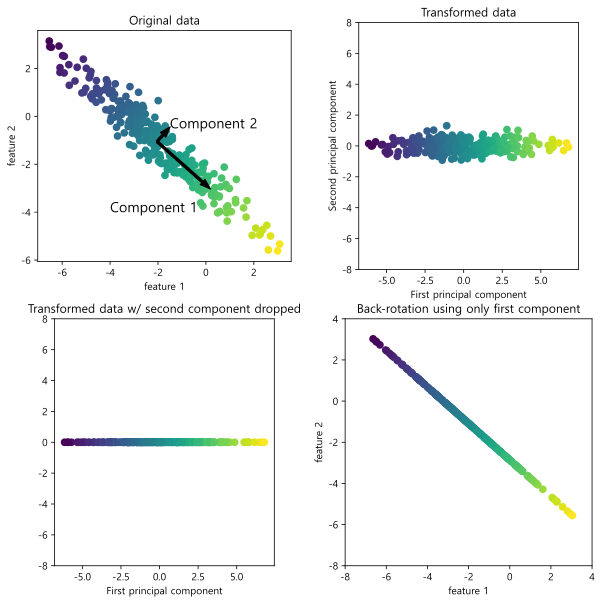

In [30]:
mglearn.plots.plot_pca_illustration()

In [32]:
malignant = cancer['data'][cancer['target'] == 0]
benign = cancer['data'][cancer['target'] != 0]

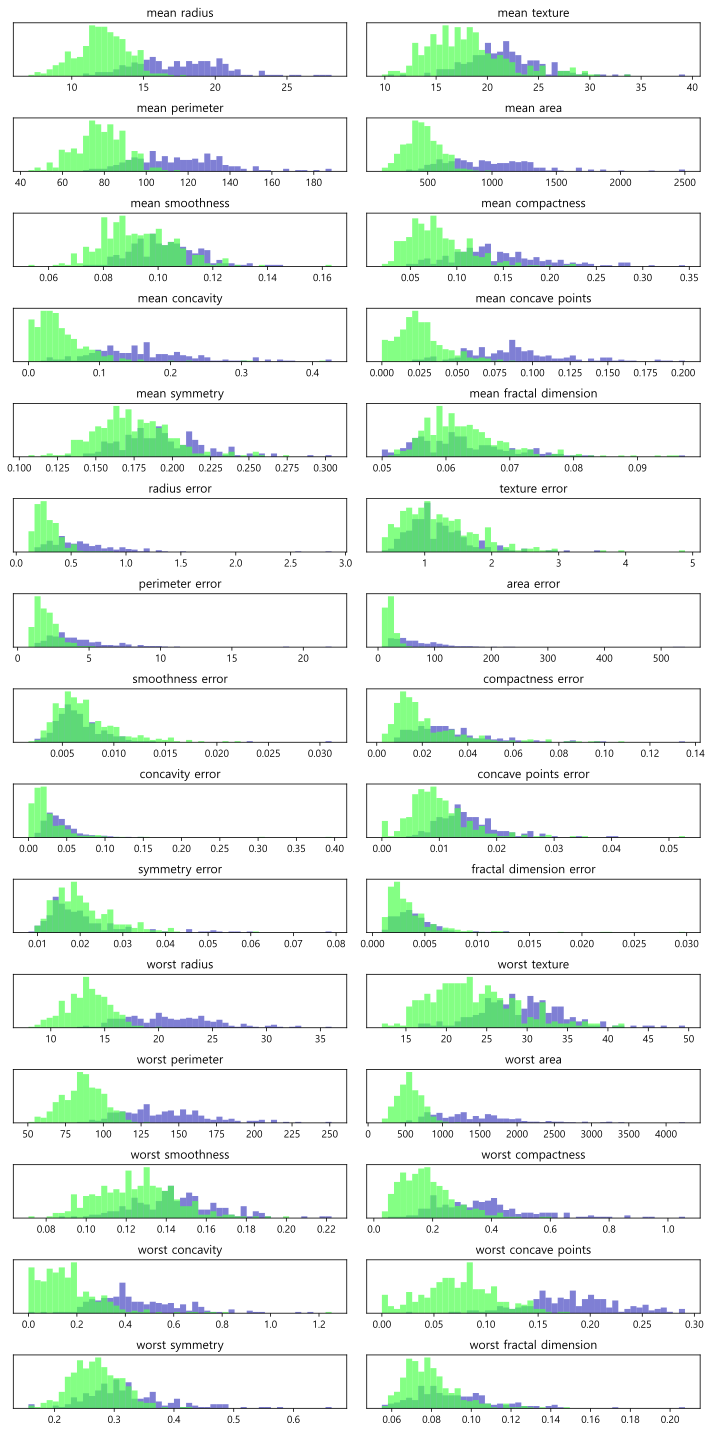

In [37]:
fig, axs = plt.subplots(15, 2, figsize=(10, 20))
ax = axs.ravel()
for i in range(30):
    freq, bins = np.histogram(cancer['data'][:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=0.7)
    ax[i].set_title(cancer['feature_names'][i])
    ax[i].set_yticks(())
fig.tight_layout()

In [40]:
scaler = StandardScaler().fit(cancer['data'])
X_scaled = scaler.transform(cancer['data'])

In [42]:
pca = PCA(n_components=2).fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_scaled.shape, X_pca.shape

((569, 30), (569, 2))

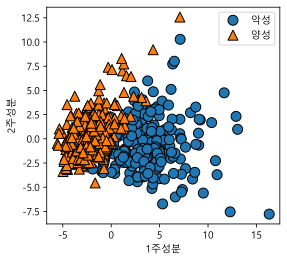

In [48]:
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer['target'])
plt.xlabel('1주성분')
plt.ylabel('2주성분')
plt.legend(['악성', '양성'])
plt.gca().set_aspect('equal')
plt.show()

In [50]:
pca.components_.shape

(2, 30)

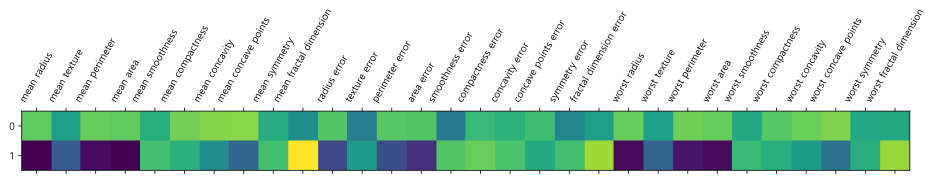

In [53]:
plt.matshow(pca.components_)
plt.xticks(range(len(cancer['feature_names'])), cancer['feature_names'], rotation=60)
plt.show()

In [55]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.5)
image_shape = people.images[0].shape

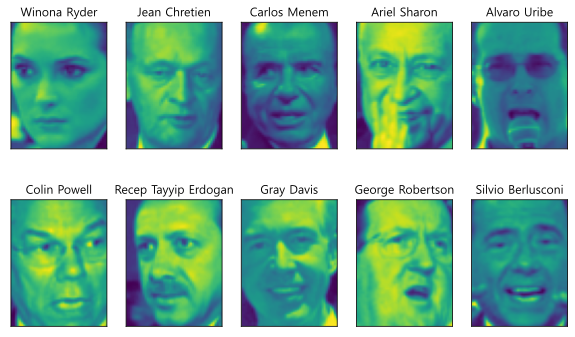

In [56]:
fig, axs = plt.subplots(2, 5, figsize=(10, 6), subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people['target'], people['images'], axs.ravel()):
    ax.imshow(image)
    ax.set_title(people['target_names'][target])

In [59]:
people['images'][0].shape

(62, 47)

In [64]:
counts = np.bincount(people['target'])
for i, (count, name) in enumerate(zip(counts, people['target_names'])):
    print(f'{name:25} {count:3}')

Alejandro Toledo           39
Alvaro Uribe               35
Amelie Mauresmo            21
Andre Agassi               36
Angelina Jolie             20
Ariel Sharon               77
Arnold Schwarzenegger      42
Atal Bihari Vajpayee       24
Bill Clinton               29
Carlos Menem               21
Colin Powell              236
David Beckham              31
Donald Rumsfeld           121
George Robertson           22
George W Bush             530
Gerhard Schroeder         109
Gloria Macapagal Arroyo    44
Gray Davis                 26
Guillermo Coria            30
Hamid Karzai               22
Hans Blix                  39
Hugo Chavez                71
Igor Ivanov                20
Jack Straw                 28
Jacques Chirac             52
Jean Chretien              55
Jennifer Aniston           21
Jennifer Capriati          42
Jennifer Lopez             21
Jeremy Greenstock          24
Jiang Zemin                20
John Ashcroft              53
John Negroponte            31
Jose Maria

In [69]:
mask = np.zeros(people['target'].shape, dtype='bool')
for target in np.unique(people['target']):
    mask[np.where(people['target'] == target)[0][:50]] = 1
X_people = people['data'][mask] / 255
y_people = people['target'][mask]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

In [74]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
knn.score(X_test, y_test)

0.24031007751937986

In [75]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape

(1547, 100)

In [76]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.3178294573643411

In [77]:
pca.components_.shape

(100, 2914)

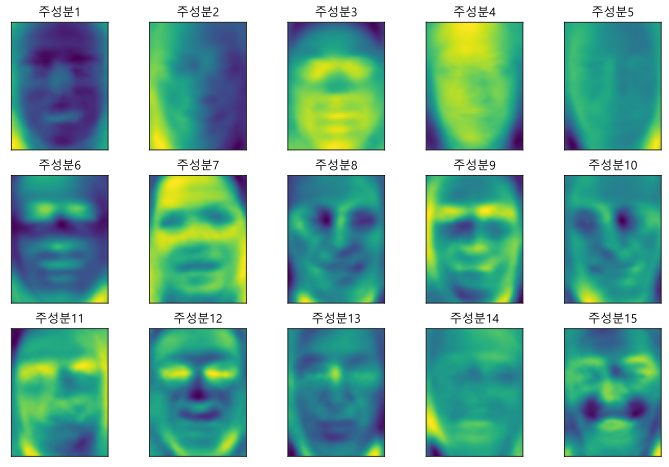

In [78]:
fig, axs = plt.subplots(3, 5, figsize=(12, 8), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axs.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title(f'주성분{i+1}')

In [81]:
np.sum(pca.explained_variance_ratio_)

0.9144232

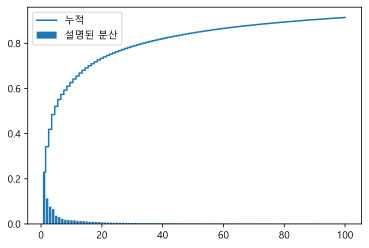

In [91]:
plt.bar(range(1, pca.n_components_+1), pca.explained_variance_ratio_, align='center', label='설명된 분산')
plt.step(range(1, pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='누적')
plt.legend()
plt.show()